# 画像処理のテスト

dataフォルダに格納されているdogとcatの2クラスの画像を分類するモデルを作成せよ。

サンプル数

- dog: 250枚
- cat: 250枚

訓練データ: 全体の70%をランダムに（seed=0）

AccuracyがValidationのデータに対して70%得られていること

In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 自作モジュール
from my_libs.load_data import load_data
from my_libs.reset_seed import reset_seed
reset_seed()

## データ読み込み

In [2]:
train, test = load_data('../data/')
len(train), len(test)

(350, 150)

In [3]:
train[0], test[0]

(('../data/cat/162.jpg', 1), ('../data/cat/261.jpg', 1))

## モデル設計・学習・評価

In [4]:
import chainer
import chainer.links as L
import chainer.functions as F
from chainer.datasets import LabeledImageDataset

from my_libs.ChainerPipeline import ChainerPipeline

epoch       main/accuracy  validation/main/accuracy  main/loss   validation/main/loss  elapsed_time
1           0.482955       0.504167                  12048.8     5157.26               2.72083       
2           0.556818       0.602083                  2270.18     1248.67               4.65886       
3           0.670455       0.6                       682.009     726.443               6.60414       
4           0.710227       0.577083                  340.017     668.326               8.55623       
5           0.818182       0.708333                  119.256     271.888               10.4961       
6           0.838068       0.672917                  82.4566     260.313               12.4405       
7           0.903409       0.647917                  47.3116     311.712               14.3824       
8           0.907738       0.727083                  37.1141     226.017               16.2664       
9           0.977273       0.660417                  3.6486      234.796            

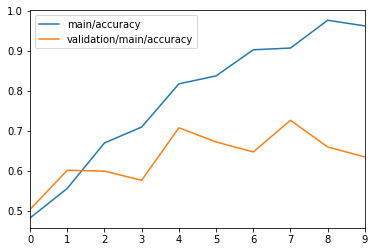

In [5]:
class MyProcessing:
    def __init__(self):
        pass
    
    def transform(seif, x):
        return LabeledImageDataset(x)
    
    
class MyCNN(chainer.Chain):
    def __init__(self, n_mid=100, n_out=2):
        super().__init__()
        with self.init_scope():
            self.cnv1 = L.Convolution2D(in_channels=3, 
                                        out_channels=16, 
                                        ksize=3,
                                        stride=1,
                                        pad=1)
            self.fc1 = L.Linear(None, n_mid)
            self.fco = L.Linear(None, n_out)
            
    def __call__(self, x):
        h = self.cnv1(x)
        h = F.relu(h)
        h = F.max_pooling_2d(h, 3, 3)
        h = self.fc1(h)
        h = self.fco(h)
        return h

setting = {
    'epoch': 10,
    'batch_size': 16,
    'use_gpu': True
}
    
p = ChainerPipeline(MyProcessing(), MyCNN(), train, test, setting)
model, resul = p.run()